# Library

In [1]:
import pandas as pd
import numpy as np
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Conv1D, MaxPooling1D, Flatten, TimeDistributed
from sklearn.preprocessing import MinMaxScaler

plt.rcParams["font.family"] = "Malgun Gothic"  

# Data Loading

In [2]:
data_path = r"C:\Users\james\J_Data_Lab\Project-FXCast\data\df_investing2.csv"
df = pd.read_csv(data_path)

In [3]:
df

,date,USD_KRW 종가,USD_KRW 시가,KOSPI 종가,KOSPI 거래량,KOSDAQ 종가,KOSDAQ 거래량,WTI Price,XAU Price,DJI 종가,DJI 거래량,SP500 종가,M1,M2,한국 정책금리,미국 정책금리,CPI,PPI,경상수지
0,2024-12-30,1469.25,1471.10,2399.49,303960000.0,678.19,6.445500e+08,70.99,2605.39,42573.73,383300000.0,5906.94,1274.2903,4183.5354,3.00,4.645161,1.9,119.52,12368.0
1,2024-12-27,1472.50,1468.40,2404.77,311290000.0,665.97,8.141300e+08,70.08,2620.00,42992.21,376960000.0,5970.84,1274.2903,4183.5354,3.00,4.645161,1.9,119.52,12368.0
2,2024-12-26,1467.08,1457.21,2429.67,322800000.0,675.64,8.292900e+08,69.53,2634.43,43325.80,270360000.0,6037.59,1274.2903,4183.5354,3.00,4.645161,1.9,119.52,12368.0
3,2024-12-24,1458.93,1453.28,2440.52,386780000.0,680.11,6.451000e+08,69.92,2613.20,43297.03,230410000.0,6040.04,1274.2903,4183.5354,3.00,4.645161,1.9,119.52,12368.0
4,2024-12-23,1451.28,1446.05,2442.01,428170000.0,679.24,6.577100e+08,69.34,2612.93,42906.95,449400000.0,5974.07,1274.2903,4183.5354,3.00,4.645161,1.9,119.52,12368.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1181,2020-01-08,1162.25,1168.30,2151.31,913830000.0,640.94,1.380000e+09,59.97,1555.81,28745.09,296430000.0,3253.10,944.3064,2935.6403,1.25,1.750000,1.2,101.02,185.0
1182,2020-01-07,1167.30,1167.54,2175.54,568240000.0,663.44,9.703100e+08,64.92,1573.99,28583.68,266680000.0,3237.20,944.3064,2935.6403,1.25,1.750000,1.2,101.02,185.0
1183,2020-01-06,1166.94,1165.89,2155.07,592670000.0,655.31,8.842800e+08,62.99,1565.96,28703.38,261810000.0,3246.30,944.3064,2935.6403,1.25,1.750000,1.2,101.02,185.0
1184,2020-01-03,1164.95,1157.95,2176.46,631560000.0,669.93,9.038600e+08,63.10,1551.65,28634.88,239590000.0,3234.80,944.3064,2935.6403,1.25,1.750000,1.2,101.02,185.0


In [4]:
def eda_basic_info(df, df_name="DataFrame"):
    print(f"\n===== {df_name} =====")
    print("Head (5 rows):")
    display(df.head())
    
    print("\nInfo:")
    print(df.info())
    
    print("\nDescribe (numeric):")
    display(df.describe())
    
    print("\nNull counts:")
    print(df.isnull().sum())
    
    print("="*40)

In [5]:
eda_basic_info(df, "df")


===== df =====
Head (5 rows):


,date,USD_KRW 종가,USD_KRW 시가,KOSPI 종가,KOSPI 거래량,KOSDAQ 종가,KOSDAQ 거래량,WTI Price,XAU Price,DJI 종가,DJI 거래량,SP500 종가,M1,M2,한국 정책금리,미국 정책금리,CPI,PPI,경상수지
0,2024-12-30,1469.25,1471.10,2399.49,303960000.0,678.19,644550000.0,70.99,2605.39,42573.73,383300000.0,5906.94,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
1,2024-12-27,1472.50,1468.40,2404.77,311290000.0,665.97,814130000.0,70.08,2620.00,42992.21,376960000.0,5970.84,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
2,2024-12-26,1467.08,1457.21,2429.67,322800000.0,675.64,829290000.0,69.53,2634.43,43325.80,270360000.0,6037.59,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
3,2024-12-24,1458.93,1453.28,2440.52,386780000.0,680.11,645100000.0,69.92,2613.20,43297.03,230410000.0,6040.04,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0
4,2024-12-23,1451.28,1446.05,2442.01,428170000.0,679.24,657710000.0,69.34,2612.93,42906.95,449400000.0,5974.07,1274.2903,4183.5354,3.0,4.645161,1.9,119.52,12368.0



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1186 non-null   object 
 1   USD_KRW 종가  1186 non-null   float64
 2   USD_KRW 시가  1186 non-null   float64
 3   KOSPI 종가    1186 non-null   float64
 4   KOSPI 거래량   1186 non-null   float64
 5   KOSDAQ 종가   1186 non-null   float64
 6   KOSDAQ 거래량  1186 non-null   float64
 7   WTI Price   1186 non-null   float64
 8   XAU Price   1186 non-null   float64
 9   DJI 종가      1186 non-null   float64
 10  DJI 거래량     1186 non-null   float64
 11  SP500 종가    1186 non-null   float64
 12  M1          1186 non-null   float64
 13  M2          1186 non-null   float64
 14  한국 정책금리     1186 non-null   float64
 15  미국 정책금리     1186 non-null   float64
 16  CPI         1186 non-null   float64
 17  PPI         1186 non-null   float64
 18  경상수지        1186 non-null   float64
dtypes: float64(18), obje

,USD_KRW 종가,USD_KRW 시가,KOSPI 종가,KOSPI 거래량,KOSDAQ 종가,KOSDAQ 거래량,WTI Price,XAU Price,DJI 종가,DJI 거래량,SP500 종가,M1,M2,한국 정책금리,미국 정책금리,CPI,PPI,경상수지
count,1186.000000,1186.000000,1186.000000,1.186000e+03,1186.000000,1.186000e+03,1186.000000,1186.000000,1186.000000,1.186000e+03,1186.000000,1186.000000,1186.000000,1186.000000,1186.00000,1186.000000,1186.000000,1186.000000
mean,1256.282968,1256.633221,2596.073440,7.131867e+08,841.160118,1.306049e+09,69.533440,1937.514081,33603.138786,3.687432e+08,4250.179671,1219.394587,3616.388458,2.037789,2.60763,2.811298,111.501433,5333.790894
std,93.743223,93.787299,339.282251,3.554851e+08,114.428855,5.210409e+08,23.291945,263.590609,4657.788950,1.128756e+08,764.021938,103.680673,347.336672,1.303587,2.31595,1.658261,7.401748,4255.906435
min,1083.530000,1083.870000,1457.640000,8.245100e+05,428.350000,6.196200e+08,7.790000,1471.000000,18591.930000,1.170400e+08,2237.400000,944.306400,2935.640300,0.500000,0.25000,-0.200000,98.930000,-4205.000000
25%,1181.822500,1182.460000,2399.310000,4.629025e+08,762.185000,9.524700e+08,62.090000,1778.307500,31022.087500,3.016050e+08,3810.150000,1184.088000,3309.121000,0.548387,0.25000,1.425000,103.890000,1862.000000
50%,1265.610000,1266.325000,2568.480000,6.137650e+08,847.505000,1.170000e+09,73.735000,1870.390000,33913.620000,3.433250e+08,4200.010000,1221.110000,3718.332800,1.750000,1.75000,2.700000,116.270000,6365.000000
75%,1333.020000,1333.395000,2758.637500,8.662025e+08,919.412500,1.500000e+09,82.030000,1985.455000,35627.822500,4.021650e+08,4591.015000,1287.187300,3843.786700,3.500000,5.25000,3.800000,117.500000,7438.000000
max,1472.500000,1471.100000,3305.210000,3.460000e+09,1060.000000,5.070000e+09,126.470000,2786.190000,45014.040000,1.220000e+09,6090.270000,1371.920900,4183.535400,3.500000,5.50000,6.300000,119.560000,13096.000000



Null counts:
date          0
USD_KRW 종가    0
USD_KRW 시가    0
KOSPI 종가      0
KOSPI 거래량     0
KOSDAQ 종가     0
KOSDAQ 거래량    0
WTI Price     0
XAU Price     0
DJI 종가        0
DJI 거래량       0
SP500 종가      0
M1            0
M2            0
한국 정책금리       0
미국 정책금리       0
CPI           0
PPI           0
경상수지          0
dtype: int64


# Modeling

In [11]:
## 0. Seed 설정
seed = 123
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)

In [12]:
## 1. Prep
# datetime으로 변환 후 정렬
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

# Train: 2020 ~ 2023, Test : 2023 ~ 2024
train_df = df[df['date'] < '2023-01-01'].copy()
test_df = df[df['date'] >= '2023-01-01'].copy()

# date 컬럼 제거
train_data = train_df.drop(columns=['date']).values
test_data = test_df.drop(columns=['date']).values

# MinMax 스케일링 
scaler = MinMaxScaler()
scaler.fit(train_data)
train_scaled = scaler.transform(train_data)
test_scaled = scaler.transform(test_data)

In [13]:
## 2. DataSet
def create_sequences(data, window_size, target_index=0):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size, target_index])
    return np.array(X), np.array(y)

window_size = 10  # 과거 시점의 길이 (시퀀스 길이) (몇으로 설정?)
X_train, y_train = create_sequences(train_scaled, window_size, target_index=0) # target_index=0 은 USD_KRW 종가
X_test, y_test = create_sequences(test_scaled, window_size, target_index=0)

# CNN-LSTM, CNN-GRU 모델은 4차원 입력 필요 (samples, n_seq, n_steps, n_features)
n_seq = 2
n_steps = window_size // n_seq  
n_features = X_train.shape[2]

X_train_cnn = X_train.reshape((X_train.shape[0], n_seq, n_steps, n_features))
X_test_cnn = X_test.reshape((X_test.shape[0], n_seq, n_steps, n_features))

In [17]:
## 3. Build Model
# LSTM
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# GRU
def build_gru_model(input_shape):
    model = Sequential()
    model.add(GRU(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# CNN_LSTM
def build_cnn_lstm_model(input_shape):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# CNN_GRU
def build_cnn_gru_model(input_shape):
    model = Sequential()
    model.add(TimeDistributed(Conv1D(filters=256, kernel_size=3, activation='relu'), input_shape=input_shape))
    model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
    model.add(TimeDistributed(Flatten()))
    model.add(GRU(50, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse', metrics=['mape'])
    return model

# 모델 입력 shape 설정
lstm_input_shape = (X_train.shape[1], n_features)  # (window_size, n_features)
cnn_input_shape = (n_seq, n_steps, n_features)

# 각 모델 생성
lstm_model = build_lstm_model(lstm_input_shape)
gru_model = build_gru_model(lstm_input_shape)
cnn_lstm_model = build_cnn_lstm_model(cnn_input_shape)
cnn_gru_model = build_cnn_gru_model(cnn_input_shape)

In [18]:
## 4. 모델 학습
epochs = 50
batch_size = 64

print("$학습 중$")
history_lstm = lstm_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
history_gru = gru_model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
history_cnn_lstm = cnn_lstm_model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, verbose=0)
history_cnn_gru = cnn_gru_model.fit(X_train_cnn, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

## 5. 테스트셋 평가 및 성능 지표 출력 (MSE, MAPE)
lstm_eval = lstm_model.evaluate(X_test, y_test, verbose=0)
gru_eval = gru_model.evaluate(X_test, y_test, verbose=0)
cnn_lstm_eval = cnn_lstm_model.evaluate(X_test_cnn, y_test, verbose=0)
cnn_gru_eval = cnn_gru_model.evaluate(X_test_cnn, y_test, verbose=0)

print("\n모델 평가 결과:")
print("LSTM     - MSE: {:.4f}, MAPE: {:.4f}".format(lstm_eval[0], lstm_eval[1]))
print("GRU      - MSE: {:.4f}, MAPE: {:.4f}".format(gru_eval[0], gru_eval[1]))
print("CNN-LSTM - MSE: {:.4f}, MAPE: {:.4f}".format(cnn_lstm_eval[0], cnn_lstm_eval[1]))
print("CNN-GRU  - MSE: {:.4f}, MAPE: {:.4f}".format(cnn_gru_eval[0], cnn_gru_eval[1]))

$학습 중$

모델 평가 결과:
LSTM     - MSE: 0.0054, MAPE: 6.9243
GRU      - MSE: 0.0023, MAPE: 5.5605
CNN-LSTM - MSE: 0.0090, MAPE: 10.3932
CNN-GRU  - MSE: 0.0162, MAPE: 15.0522


# Plot

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


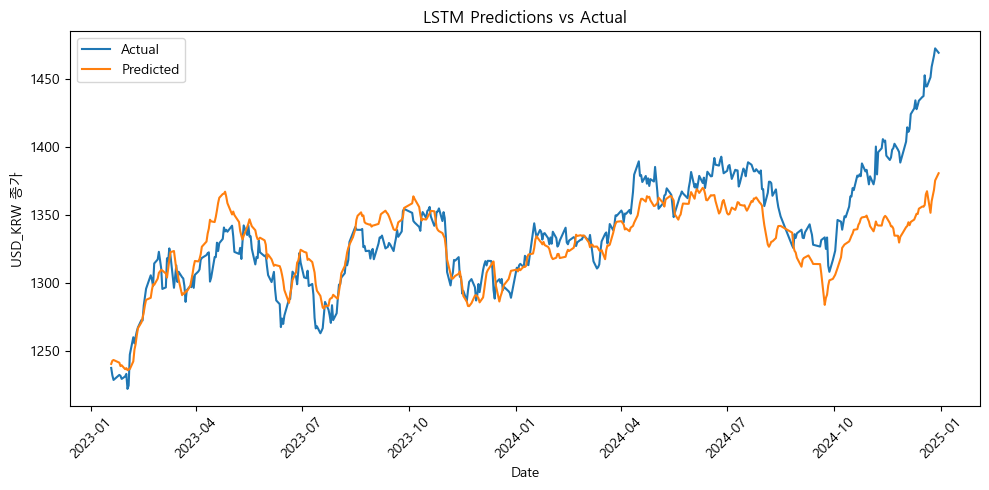

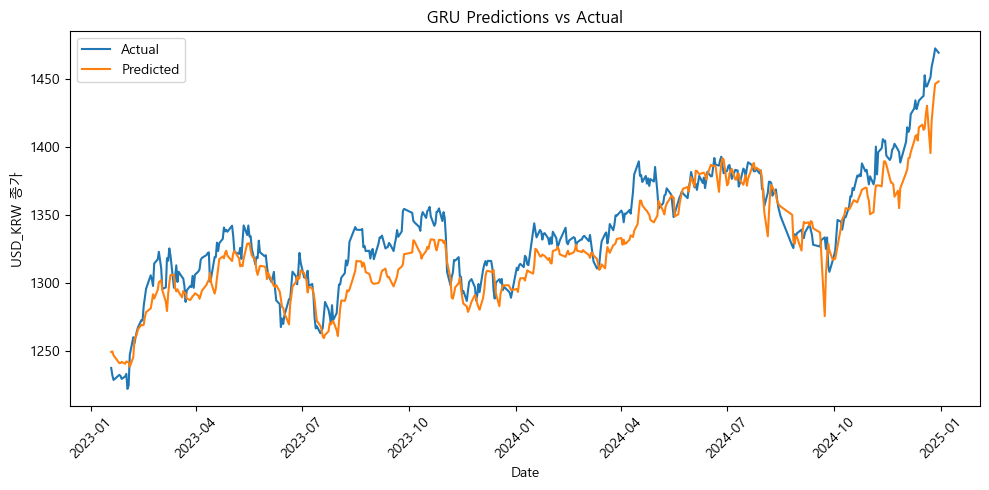

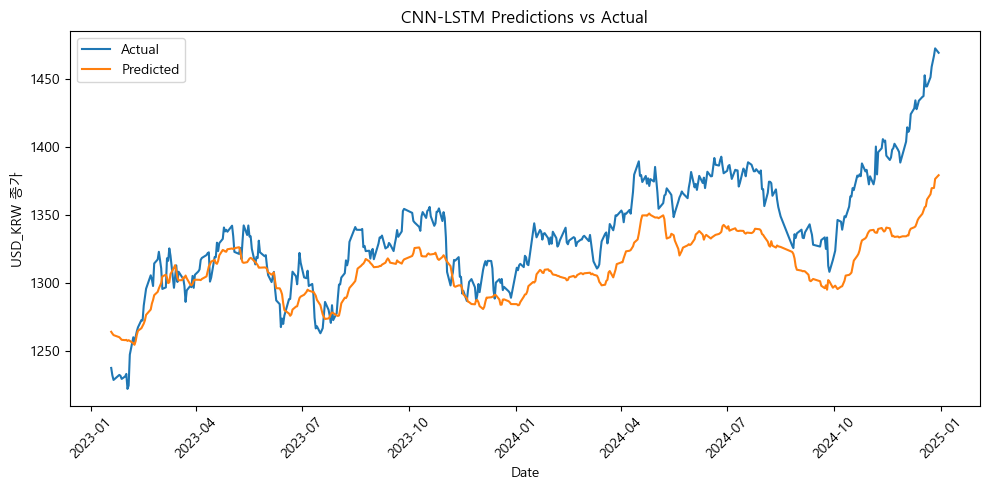

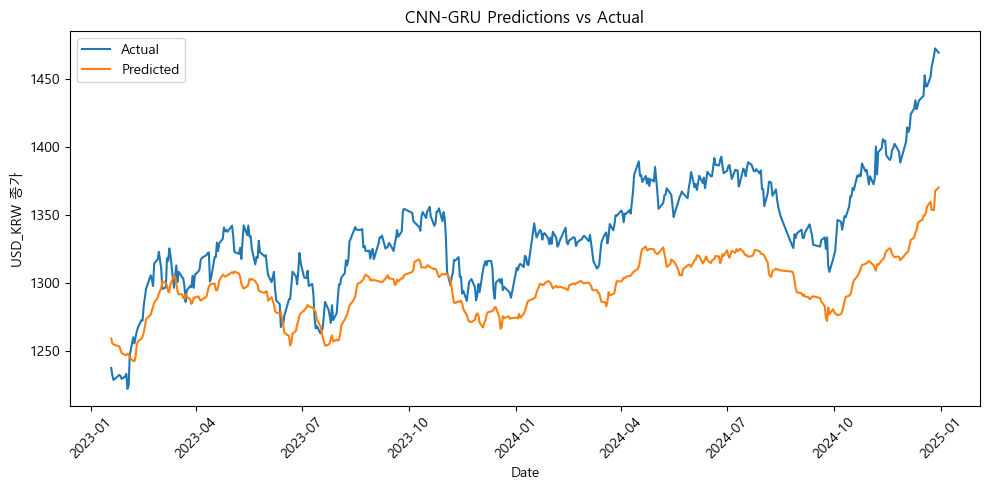

In [19]:
## 6. 시각화
# 테스트셋에 대해 각 모델별 예측값과 실제값을 비교
pred_lstm = lstm_model.predict(X_test)
pred_gru = gru_model.predict(X_test)
pred_cnn_lstm = cnn_lstm_model.predict(X_test_cnn)
pred_cnn_gru = cnn_gru_model.predict(X_test_cnn)

# 기존 예측값과 실제 y값 복원
target_min = scaler.data_min_[0]
target_range = scaler.data_range_[0]

y_true_actual = y_test * target_range + target_min
pred_lstm_actual = pred_lstm.flatten() * target_range + target_min
pred_gru_actual = pred_gru.flatten() * target_range + target_min
pred_cnn_lstm_actual = pred_cnn_lstm.flatten() * target_range + target_min
pred_cnn_gru_actual = pred_cnn_gru.flatten() * target_range + target_min

# 날짜 추출
dates_test = test_df['date'].reset_index(drop=True)
x_dates = dates_test[window_size:].values

# 시각화 
def plot_predictions_actual(x_dates, y_true, y_pred, model_name):
    plt.figure(figsize=(10, 5))
    plt.plot(x_dates, y_true, label='Actual')
    plt.plot(x_dates, y_pred, label='Predicted')
    plt.xlabel('Date')
    plt.ylabel('USD_KRW 종가')
    plt.title(f'{model_name} Predictions vs Actual')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 각 모델별 시각화
plot_predictions_actual(x_dates, y_true_actual, pred_lstm_actual, 'LSTM')
plot_predictions_actual(x_dates, y_true_actual, pred_gru_actual, 'GRU')
plot_predictions_actual(x_dates, y_true_actual, pred_cnn_lstm_actual, 'CNN-LSTM')
plot_predictions_actual(x_dates, y_true_actual, pred_cnn_gru_actual, 'CNN-GRU')